<a href="https://colab.research.google.com/github/HusseK/MBTI/blob/main/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stanza unicodedata string nltk re textblob gensim autocorrect wordcloud collections


ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [ ]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 6.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=1a680b2dbf78fea80b4d10adfbe6789e74fc2da1ff4eb6a27bcd2f3f173c0f3c
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!python script_MBTi.py

Traceback (most recent call last):
  File "script_MBTi.py", line 1, in <module>
    from MBTI import MBTI
  File "/content/MBTI.py", line 2, in <module>
    from DataUnit import DataUnit
  File "/content/DataUnit.py", line 19, in <module>
    from autocorrect import Speller
ModuleNotFoundError: No module named 'autocorrect'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
import pandas as pd
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
def remove_punctuation( s):
        return s.translate(str.maketrans('', '', string.punctuation))

def remove_url(s):
        for i in range(data.shape[0]):
            return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', s)

In [ ]:
remove_punctuation( remove_url( remove_stopwords(data.iloc[0,1])))
for i in range(data.shape[0]):
  data.iloc[i,1]=remove_punctuation( remove_url( remove_stopwords(data.iloc[i,1])))
  

In [ ]:
data= pd.read_csv("mbti_1.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


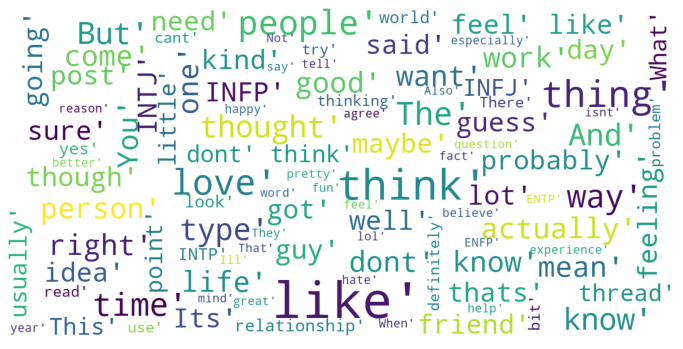

In [ ]:
plot_wordcloud(data.iloc[:,1])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def plot_top_ngrams_barchart(text, n=2):
        stop=set(stopwords.words('english'))
    
        new= text.str.split()
        new=new.values.tolist()
        corpus=[word for i in new for word in i]
    
        def _get_top_ngram(corpus, n=None):
            vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0) 
            words_freq = [(word, sum_words[0, idx]) 
                          for word, idx in vec.vocabulary_.items()]
            words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
            return words_freq[:10]
    
        top_n_bigrams=_get_top_ngram(text,n)[:10]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)

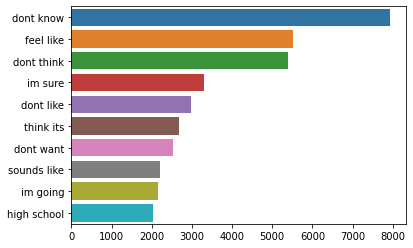

In [ ]:
plot_top_ngrams_barchart(data.iloc[:,1])

In [ ]:
import nltk
import spacy
import scattertext as st
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(data[0:10],
                             category_col='type',
                             text_col='posts',
                             nlp=nlp).build()

In [ ]:
html = st.produce_scattertext_explorer(
    corpus,
    category='democrat', category_name='Democratic', not_category_name='Republican',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['speaker'],
    transform=st.Scalers.dense_rank
)
open('./demo_compact.html', 'w').write(html)

KeyError: ignored